In [1]:
import eos

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Theory Predictions and their Uncertainties

## Listing the built-in Observables

In [2]:
eos.Observables(prefix='D', name='BR')

In [3]:
eos.Observables()['B->Dlnu::BR']

## Constructing and Evaluating an Observable

In [4]:
parameters = eos.Parameters.Defaults()
kinematics = eos.Kinematics(q2_min=0.02, q2_max=11.60)
obs = eos.Observable.make('B->Dlnu::BR', parameters, kinematics, eos.Options())
display(obs)

B->Dlnu::BR,(eos.Observable)
current value,0.023


In [5]:
kinematics = eos.Kinematics(q2_min=3.17, q2_max=11.60)
obs = eos.Observable.make('B->Dlnu::BR', parameters, kinematics, eos.Options(l='tau'))
display(obs)

B->Dlnu::BR,(eos.Observable)
current value,0.006886


## Estimating Theory Uncertainties

In [6]:
analysis_args={
    'global_options': None,
    'priors': [
        { 'parameter': 'B->D::alpha^f+_0@BSZ2015', 'min':  0.0, 'max':  1.0, 'type': 'uniform' },
        { 'parameter': 'B->D::alpha^f+_1@BSZ2015', 'min': -5.0, 'max': +5.0, 'type': 'uniform' },
        { 'parameter': 'B->D::alpha^f+_2@BSZ2015', 'min': -5.0, 'max': +5.0, 'type': 'uniform' },
        { 'parameter': 'B->D::alpha^f0_1@BSZ2015', 'min': -5.0, 'max': +5.0, 'type': 'uniform' },
        { 'parameter': 'B->D::alpha^f0_2@BSZ2015', 'min': -5.0, 'max': +5.0, 'type': 'uniform' }
    ],
    'likelihood': [
        'B->D::f_++f_0@HPQCD2015A'
    ]
}
analysis = eos.Analysis(**analysis_args)
obs_mu  = eos.Observable.make(
    'B->Dlnu::BR',
    analysis.parameters,
    eos.Kinematics(q2_min=0.02, q2_max=11.60),
    eos.Options(**{'l':'mu', 'form-factors':'BSZ2015'})
)
obs_tau = eos.Observable.make(
    'B->Dlnu::BR',
    analysis.parameters,
    eos.Kinematics(q2_min=3.17, q2_max=11.60),
    eos.Options(**{'l':'tau','form-factors':'BSZ2015'})
)
obs_R_D = eos.Observable.make(
    'B->Dlnu::R_D',
    analysis.parameters,
    eos.Kinematics(q2_min_mu=0.02, q2_min_tau=3.17, q2_max_mu=11.60, q2_max_tau=11.60),
    eos.Options(**{'form-factors':'BSZ2015'})
)
observables=(obs_mu, obs_tau, obs_R_D)

In [7]:
parameter_samples, weights, observable_samples = analysis.sample(N=5000, observables=observables)

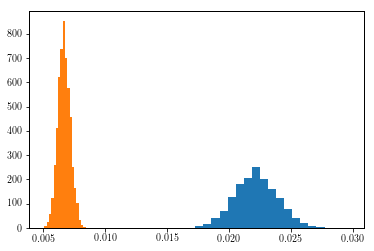

B->Dlnu::BR: 0.0222 +/- 0.0018
B->Dlnu::BR: 0.0067 +/- 0.0005


In [8]:
import matplotlib.pyplot as plt
import numpy as np
_, _, plot = plt.hist(observable_samples[:,0], weights=weights, bins=20, color='C0', density=True)
_, _, plot = plt.hist(observable_samples[:,1], weights=weights, bins=20, color='C1', density=True)
plt.show()
print('{obs}: {mean:.4f} +/- {std:.4f}'.format(
    obs=obs_mu.name(),
    mean=np.average(observable_samples[:,0], weights=weights),
    std=np.sqrt(np.var(observable_samples[:, 0]))
))
print('{obs}: {mean:.4f} +/- {std:.4f}'.format(
    obs=obs_tau.name(),
    mean=np.average(observable_samples[:,1], weights=weights),
    std=np.sqrt(np.var(observable_samples[:, 1]))
))

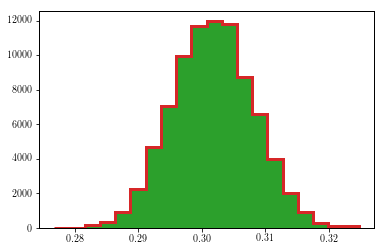

R_D (manually): 0.3017 +/- 0.0065
B->Dlnu::R_D: 0.3017 +/- 0.0065


In [9]:
import matplotlib.pyplot as plt
_, _, plot = plt.hist([o[1] / o[0] for o in observable_samples[:]], weights=weights, bins=20, color='C2')
_, _, plot = plt.hist(observable_samples[:,2], histtype='step',     weights=weights, bins=20, color='C3', lw=3)
plt.show()
print('{obs}: {mean:.4f} +/- {std:.4f}'.format(
    obs='R_D (manually)',
    mean=np.average([o[1] / o[0] for o in observable_samples[:]], weights=weights),
    std=np.sqrt(np.var([o[1] / o[0] for o in observable_samples[:]]))
))
print('{obs}: {mean:.4f} +/- {std:.4f}'.format(
    obs=obs_R_D.name(),
    mean=np.average(observable_samples[:,2], weights=weights),
    std=np.sqrt(np.var(observable_samples[:, 2]))
))